In [55]:
from ultralytics.models.sam import SAM
from PIL import Image
import matplotlib.pyplot as plt
import openvino as ov
import torch
import torch.nn as nn
import numpy as np
import openvino.runtime as ov

c:\Users\zeyad\miniconda3\envs\multimodal\Lib\site-packages\openvino\runtime\__init__.py:10: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.
  warnings.warn(


In [27]:
img_path = "../data/dummy_selfie.png"
bbox = [501.4826,  188.8253,  706.8513,  493.8286]

Model summary: 251 layers, 10,130,092 parameters, 10,130,092 gradients
(251, 10130092, 10130092, 0.0)

image 1/1 c:\Users\zeyad\Desktop\Workspace\Vandalizer\notebooks\..\data\dummy_selfie.png: 1024x1024 1 0, 1232.9ms
Speed: 14.2ms preprocess, 1232.9ms inference, 12.2ms postprocess per image at shape (1, 3, 1024, 1024)


(np.float64(-0.5), np.float64(1183.5), np.float64(789.5), np.float64(-0.5))

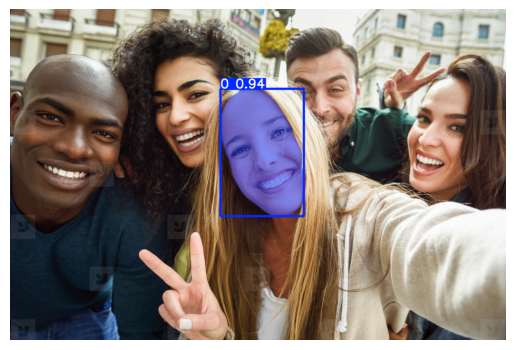

In [28]:
model = SAM("mobile_sam.pt")
print(model.info())

results = model(img_path, bboxes=bbox)
img = results[0].plot()
plt.imshow(img[:, :, ::-1])
plt.axis("off")

In [56]:
core = ov.Core()

In [42]:
encoder = model.model.image_encoder 
encoder.eval()

dummy_input = torch.randn(1, 3, 1024, 1024)

# 3. Use OpenVINO's Python API to convert the module directly
# We pass the encoder module, not the full SAM wrapper
print("Starting conversion...")
ov_encoder = ov.convert_model(encoder, example_input=dummy_input)

# 4. Save to disk
ov.save_model(ov_encoder, "mobile_sam_encoder.xml")
print("Exported successfully: mobile_sam_encoder.xml")

Starting conversion...
Exported successfully: mobile_sam_encoder.xml
